# Classical classification models and deep neural networks

In [1]:
#Useful libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Modeling
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
#Data Processing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
#Evaluation
from sklearn.metrics import accuracy_score, recall_score, f1_score, precision_score, classification_report, confusion_matrix

### Preparation and analysis of the dataset

In [2]:
#Datasets are imported
df_train=pd.read_csv('data/Train.csv')
df_test=pd.read_csv('data/Test.csv')

In [3]:
#The attributes information is displayed
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [4]:
#The first instances of the dataframe are shown
df_train.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A


In [5]:
#The attributes information is displayed
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2627 entries, 0 to 2626
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2627 non-null   int64  
 1   Gender           2627 non-null   object 
 2   Ever_Married     2577 non-null   object 
 3   Age              2627 non-null   int64  
 4   Graduated        2603 non-null   object 
 5   Profession       2589 non-null   object 
 6   Work_Experience  2358 non-null   float64
 7   Spending_Score   2627 non-null   object 
 8   Family_Size      2514 non-null   float64
 9   Var_1            2595 non-null   object 
 10  Segmentation     2627 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 225.9+ KB


In [6]:
#The first instances of the dataframe are shown
df_test.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,458989,Female,Yes,36,Yes,Engineer,0.0,Low,1.0,Cat_6,B
1,458994,Male,Yes,37,Yes,Healthcare,8.0,Average,4.0,Cat_6,A
2,458996,Female,Yes,69,No,NaN,0.0,Low,1.0,Cat_6,A
3,459000,Male,Yes,59,No,Executive,11.0,High,2.0,Cat_6,B
4,459001,Female,No,19,No,Marketing,NaN,Low,4.0,Cat_6,A


In [7]:
#Null values are summed per attribute
df_train.isna().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience    829
Spending_Score       0
Family_Size        335
Var_1               76
Segmentation         0
dtype: int64

In [8]:
df_train['Segmentation'].value_counts()

D    2268
A    1972
C    1970
B    1858
Name: Segmentation, dtype: int64

In [9]:
#The numerical values are replaced by the mean of the attribute to which it belongs.
df_train.fillna(df_train.median(), inplace = True)
df_test.fillna(df_test.median(), inplace = True)

In [10]:
df_train.isna().sum()

ID                   0
Gender               0
Ever_Married       140
Age                  0
Graduated           78
Profession         124
Work_Experience      0
Spending_Score       0
Family_Size          0
Var_1               76
Segmentation         0
dtype: int64

In [11]:
#Remaining instances with null values are deleted.
df_train.dropna(axis=0, inplace=True)
df_test.dropna(axis=0, inplace=True)

In [12]:
#Statistics are obtained from the dataset
df_train.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,7669.0,NaN,NaN,NaN,463473.811579,2590.836382,458982.0,461263.0,463453.0,465715.0,467974.0
Gender,7669,2,Male,4217,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ever_Married,7669,2,Yes,4492,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,7669.0,NaN,NaN,NaN,43.508541,16.68933,18.0,31.0,40.0,53.0,89.0
Graduated,7669,2,Yes,4813,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Profession,7669,9,Artist,2449,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Work_Experience,7669.0,NaN,NaN,NaN,2.473204,3.271726,0.0,0.0,1.0,4.0,14.0
Spending_Score,7669,3,Low,4645,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Family_Size,7669.0,NaN,NaN,NaN,2.853175,1.498855,1.0,2.0,3.0,4.0,9.0
Var_1,7669,7,Cat_6,5088,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [13]:
df_test.describe(include='all').T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
ID,2488.0,NaN,NaN,NaN,463429.686495,2614.008661,458989.0,461178.75,463363.5,465667.25,467968.0
Gender,2488,2,Male,1352,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Ever_Married,2488,2,Yes,1465,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Age,2488.0,NaN,NaN,NaN,43.587219,16.924975,18.0,30.0,41.0,52.0,89.0
Graduated,2488,2,Yes,1542,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Profession,2488,9,Artist,775,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Work_Experience,2488.0,NaN,NaN,NaN,2.394695,3.214138,0.0,0.0,1.0,3.0,14.0
Spending_Score,2488,3,Low,1536,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Family_Size,2488.0,NaN,NaN,NaN,2.795016,1.533103,1.0,2.0,2.0,4.0,9.0
Var_1,2488,7,Cat_6,1622,NaN,NaN,NaN,NaN,NaN,NaN,NaN


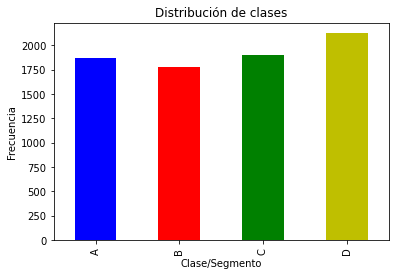

In [14]:
#The distribution by class is obtained
(df_train.groupby('Segmentation').size()).plot(kind='bar',color=['b','r','g','y'])
plt.xlabel('Clase/Segmento')
plt.ylabel('Frecuencia')
plt.title('Distribución de clases')
plt.show()

In [15]:
#The dataset is separated into training and test. The dimensions of the new sets are observed
Xc_train=df_train.drop(['Segmentation'], axis = 1)
yc_train=df_train['Segmentation']
Xc_test=df_test.drop(['Segmentation'], axis = 1)
yc_test=df_test['Segmentation']

In [16]:
#Entries are recoded to numerical values by removing the first new attribute generated for each original attribute.
Xc_train=pd.get_dummies(Xc_train)#, drop_first=False)
Xc_test=pd.get_dummies(Xc_test)#, drop_first=False)

In [17]:
#A scaling is performed on the input attributes.
mms=MinMaxScaler()
Xc_train_esc = pd.DataFrame(mms.fit_transform(Xc_train), columns = Xc_train.columns)
Xc_test_esc = pd.DataFrame(mms.fit_transform(Xc_test), columns = Xc_test.columns)

## Machine learning models

In [18]:
#Machine Learning Classifier Training and Validating
df_perf_metrics = pd.DataFrame(columns=[
    'Model', 'Accuracy_Training_Set', 'Accuracy_Test_Set', 'Precision',
    'Recall', 'f1_score'])
models_trained_list = []


def get_perf_metrics(model, i):
    # model name
    model_name = type(model).__name__
    print("Training {} model...".format(model_name))
    # Fitting of model
    model.fit(Xc_train_esc, yc_train)
    print("Completed {} model training.".format(model_name))
    # Predictions
    y_pred = model.predict(Xc_test_esc)
    # Add to ith row of dataframe - metrics

    df_perf_metrics.loc[i] = [
        model_name,
        model.score(Xc_train_esc, yc_train),
        model.score(Xc_test_esc, yc_test),
        precision_score(yc_test, y_pred, average = 'macro'),
        recall_score(yc_test, y_pred, average = 'macro'),
        f1_score(yc_test, y_pred, average = 'macro')
    ]
   
    print("Completed {} model's performance assessment.".format(model_name))

In [19]:
models_list = [LogisticRegression(max_iter=3000),
               DecisionTreeClassifier(),
               RandomForestClassifier(),
               SVC(),
               KNeighborsClassifier(),
               GaussianNB(),LinearDiscriminantAnalysis()
               ]

In [20]:
#Training, prediciting and validating process
for n, model in enumerate(models_list):
    get_perf_metrics(model, n)

Training LogisticRegression model...
Completed LogisticRegression model training.
Completed LogisticRegression model's performance assessment.
Training DecisionTreeClassifier model...
Completed DecisionTreeClassifier model training.
Completed DecisionTreeClassifier model's performance assessment.
Training RandomForestClassifier model...
Completed RandomForestClassifier model training.
Completed RandomForestClassifier model's performance assessment.
Training SVC model...
Completed SVC model training.
Completed SVC model's performance assessment.
Training KNeighborsClassifier model...
Completed KNeighborsClassifier model training.
Completed KNeighborsClassifier model's performance assessment.
Training GaussianNB model...
Completed GaussianNB model training.
Completed GaussianNB model's performance assessment.
Training LinearDiscriminantAnalysis model...
Completed LinearDiscriminantAnalysis model training.
Completed LinearDiscriminantAnalysis model's performance assessment.


In [21]:
#Comparative classification models dataframe
df_perf_metrics

,Model,Accuracy_Training_Set,Accuracy_Test_Set,Precision,Recall,f1_score
0,LogisticRegression,0.524058,0.328376,0.313651,0.319986,0.309847
1,DecisionTreeClassifier,1.000000,0.319534,0.315029,0.315001,0.312214
2,RandomForestClassifier,1.000000,0.315113,0.308796,0.309701,0.305955
3,SVC,0.551962,0.330386,0.318493,0.322615,0.318399
4,KNeighborsClassifier,0.637371,0.314711,0.304572,0.303594,0.303315
5,GaussianNB,0.491198,0.309887,0.302689,0.314851,0.292917
6,LinearDiscriminantAnalysis,0.510627,0.327170,0.316527,0.316401,0.312135


## Neural Network Classification Model

In [22]:
#Neural network modelling libraries
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

In [23]:
#The network model is defined with two intermediate layers
model_crn = Sequential([
    Dense(32, activation='relu',input_shape=[Xc_train_esc.shape[1]]),
    Dense(128, activation='relu'),
    Dense(64, activation='relu'),
    Dense(4, activation='softmax')
    ])

model_crn.compile(loss='categorical_crossentropy',
                optimizer='adam',
                metrics=['accuracy'])

In [24]:
#The summary of the neural network is shown
model_crn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                960       
                                                                 
 dense_1 (Dense)             (None, 128)               4224      
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 4)                 260       
                                                                 
Total params: 13,700
Trainable params: 13,700
Non-trainable params: 0
_________________________________________________________________


In [25]:
#Encoding target label to numerical values
yc_train_enc=pd.get_dummies(yc_train)
yc_test_enc=pd.get_dummies(yc_test)

In [26]:
#The Neural Network classification model is trained
model_crn.fit(Xc_train_esc,yc_train_enc,epochs=100,verbose=1)

Epoch 1/100
240/240 [==============================] - 3s 4ms/step - loss: 1.1636 - accuracy: 0.4887
Epoch 2/100
240/240 [==============================] - 1s 4ms/step - loss: 1.0929 - accuracy: 0.5181
Epoch 3/100
240/240 [==============================] - 1s 5ms/step - loss: 1.0806 - accuracy: 0.5226
Epoch 4/100
240/240 [==============================] - 1s 5ms/step - loss: 1.0684 - accuracy: 0.5304
Epoch 5/100
240/240 [==============================] - 1s 4ms/step - loss: 1.0612 - accuracy: 0.5338
Epoch 6/100
240/240 [==============================] - 1s 3ms/step - loss: 1.0503 - accuracy: 0.5452
Epoch 7/100
240/240 [==============================] - 1s 4ms/step - loss: 1.0426 - accuracy: 0.5449
Epoch 8/100
240/240 [==============================] - 1s 3ms/step - loss: 1.0380 - accuracy: 0.5454
Epoch 9/100
240/240 [==============================] - 1s 4ms/step - loss: 1.0327 - accuracy: 0.5456
Epoch 10/100
240/240 [==============================] - 1s 4ms/step - loss: 1.0241 - accura

In [27]:
#The accuracies achieved by the model from the training and test data are shown
train_loss, acc_crn_train = model_crn.evaluate(Xc_train_esc,  yc_train_enc, verbose=2)
print('\nTrain Acc:', acc_crn_train)

test_loss, acc_crn_test = model_crn.evaluate(Xc_test_esc,  yc_test_enc, verbose=2)
print('\nTest Acc:', acc_crn_test)

240/240 - 1s - loss: 0.5944 - accuracy: 0.7549 - 945ms/epoch - 4ms/step

Train Acc: 0.7548572421073914
78/78 - 0s - loss: 3.0155 - accuracy: 0.3232 - 306ms/epoch - 4ms/step

Test Acc: 0.3231511116027832


In [28]:
#The model predicts values from training and test data
yc_crn_pred_train=model_crn.predict(Xc_train_esc)
yc_crn_pred_test=model_crn.predict(Xc_test_esc)

78/78 [==============================] - 0s 2ms/step


In [29]:
#The classification values of the model are shown
print('Train NN \n',classification_report(yc_train_enc.values.argmax(axis=1),yc_crn_pred_train.argmax(axis=1),zero_division=True))
print('Test NN \n',classification_report(yc_test_enc.values.argmax(axis=1),yc_crn_pred_test.argmax(axis=1),zero_division=True))

Train NN 
               precision    recall  f1-score   support

           0       0.72      0.78      0.75      1867
           1       0.75      0.54      0.63      1779
           2       0.71      0.80      0.75      1896
           3       0.84      0.87      0.85      2127

    accuracy                           0.75      7669
   macro avg       0.75      0.75      0.75      7669
weighted avg       0.76      0.75      0.75      7669

Test NN 
               precision    recall  f1-score   support

           0       0.35      0.30      0.32       794
           1       0.26      0.22      0.24       523
           2       0.23      0.34      0.28       445
           3       0.41      0.41      0.41       726

    accuracy                           0.32      2488
   macro avg       0.32      0.32      0.31      2488
weighted avg       0.33      0.32      0.32      2488

